# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

#### Objetivo do projeto
- Prever a renda de indivíduos com base em variáveis socioeconômicas.


#### Perguntas de Negócio
- Quais fatores mais influenciam a renda?


#### Critérios de sucesso
- Um modelo com R² igual ou acima de 0.30 será considerado bem-sucedido 


## Etapa 2 Crisp-DM: Entendimento dos dados

Foram fornecidas 13 variáveis mais a variável resposta (Renda).

### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis                                      | Data|
| id_cliente              |  Código de identificação do cliente                                      | Inteiro|
| sexo                    |  Sexo do cliente                                      | Categórica|
| posse_de_veiculo        |  Indica se o cliente possui veículo                                      | Booleana|
| posse_de_imovel         |  Indica se o cliente possui imóvel                                      | Booleana|
| qtd_filhos              |  Quantidade de filhos do cliente                                      | Inteiro|
| tipo_renda              |  Tipo de renda do cliente                                      | Categórica|
| educacao                |  Grau de instrução do cliente                                      | Categórica|
| estado_civil            |  Estado civil do cliente                                      | Categórica|
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc)                                      | Categórica|
| idade                   |  Idade do cliente                                      | Inteiro|
| tempo_emprego           |  Tempo no emprego atual                                      | Float |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                      | Inteiro |
| renda                   |  Renda em reais                                      | Float|





#### Carregando os pacotes


In [2]:
import math

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
df = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
df.head()

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602740                    1.0  8060.34  
1            Casa     28       7.183562                    2.0  1852.15  
2            Casa     35       0.838356                    2.0  2253.89  
3            Casa     30       4.846575                    3.0  6600.77  
4   Governamental     33       4.293151                    1.0  6475.97

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(df)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analise_matheus.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Análise inicial dos dados
- "tipo_residencia" está altamente desbalanceada, com 90% das respostas sendo "casa".
- "tempo_emprego" tem 2573 (17,2%) valores ausentes.
- "Unnamed" está uniformemente distribuída e tem valores únicos iguais a 0.
- "qtd_filhos" tem 10376 (69,2%) zeros.

Para visualizar na versão html - pasta output

### Entendimento dos dados - Bivariadas




C:\Users\Matheus\AppData\Local\Temp\ipykernel_6956\56146065.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

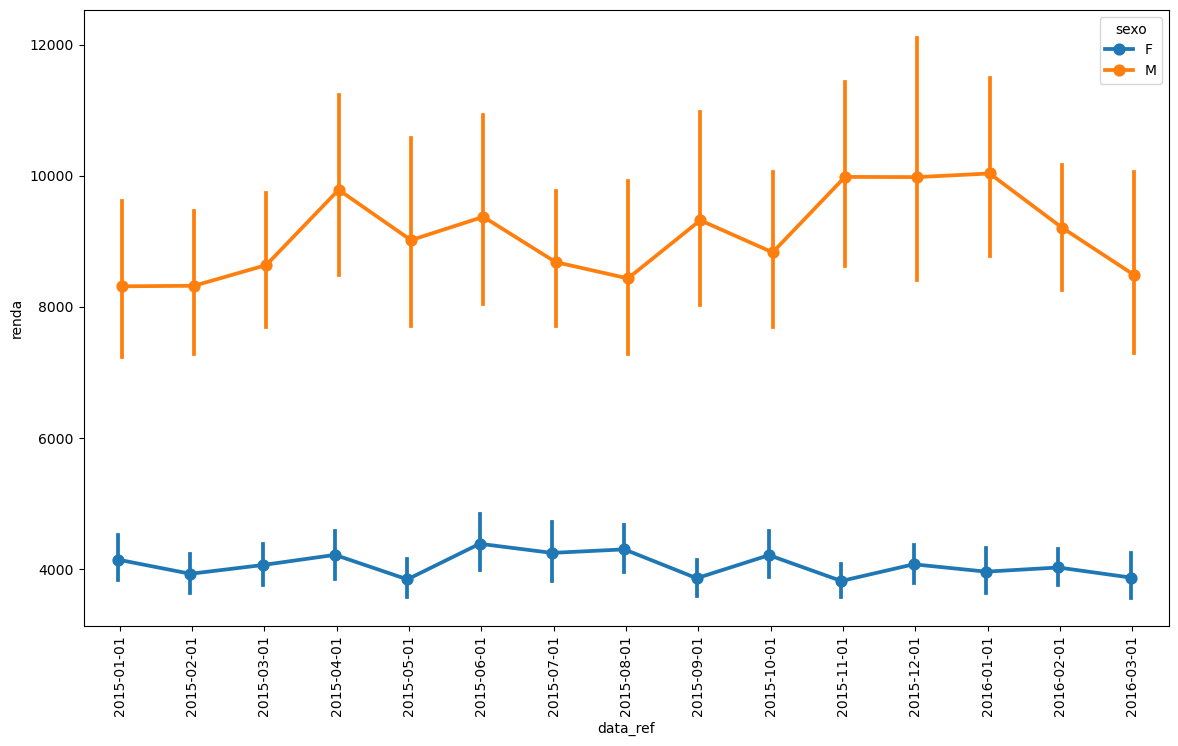

In [7]:
# médias de cada nível da variável no tempo

plt.subplots(figsize=(14, 8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=df, dodge=True, errorbar=('ci', 95))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show

C:\Users\Matheus\AppData\Local\Temp\ipykernel_6956\918517746.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

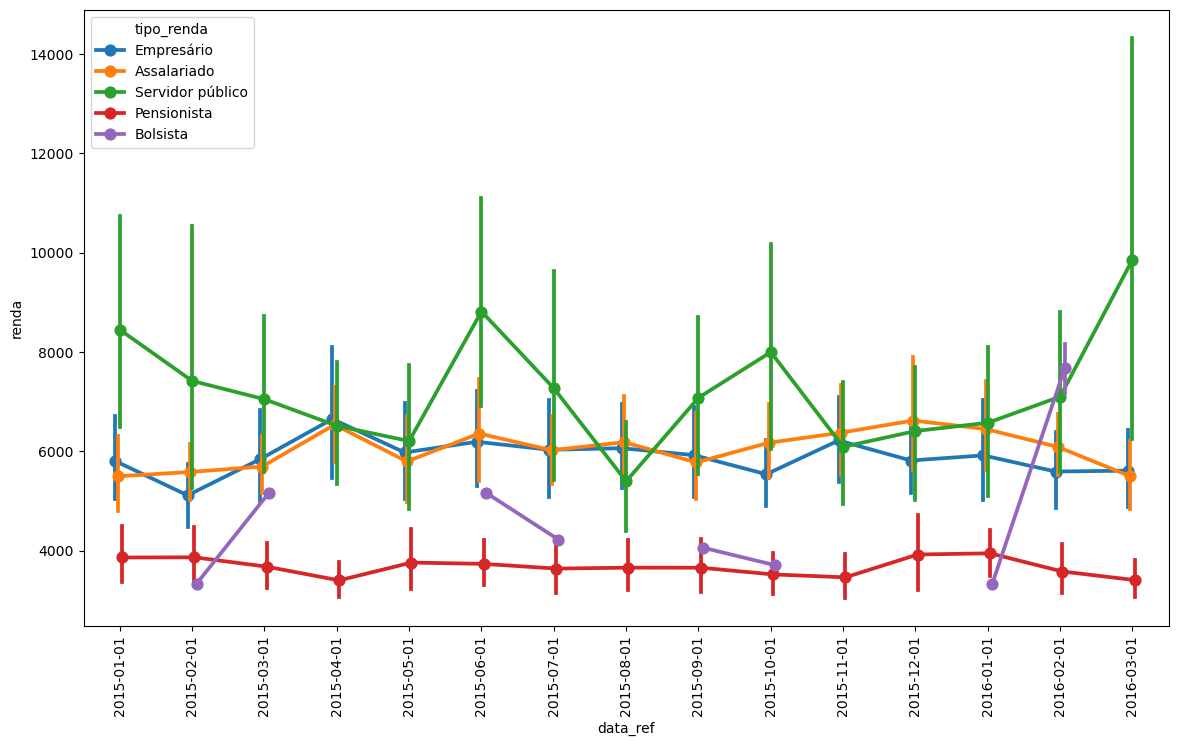

In [8]:
plt.subplots(figsize=(14, 8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_renda',
                   data=df, dodge=True, errorbar=('ci', 95))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show

C:\Users\Matheus\AppData\Local\Temp\ipykernel_6956\3923056455.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

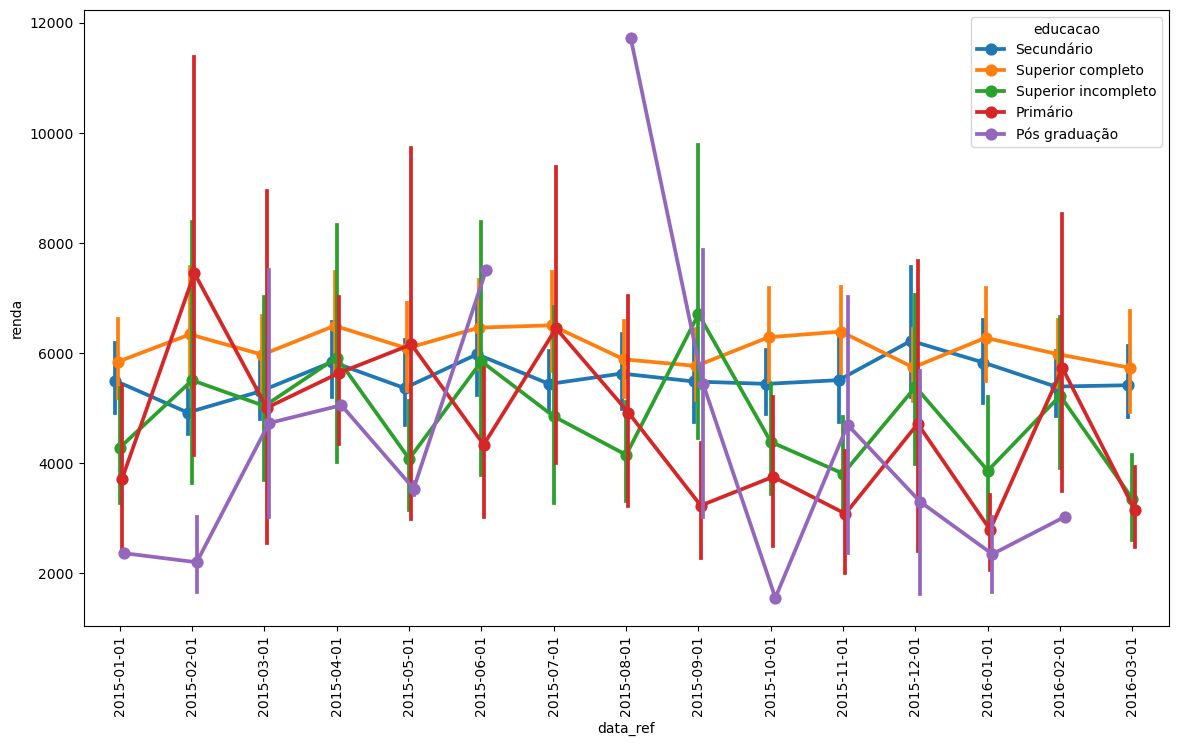

In [9]:
plt.subplots(figsize=(14, 8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'educacao',
                   data=df, dodge=True, errorbar=('ci', 95))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show

C:\Users\Matheus\AppData\Local\Temp\ipykernel_6956\4116113385.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

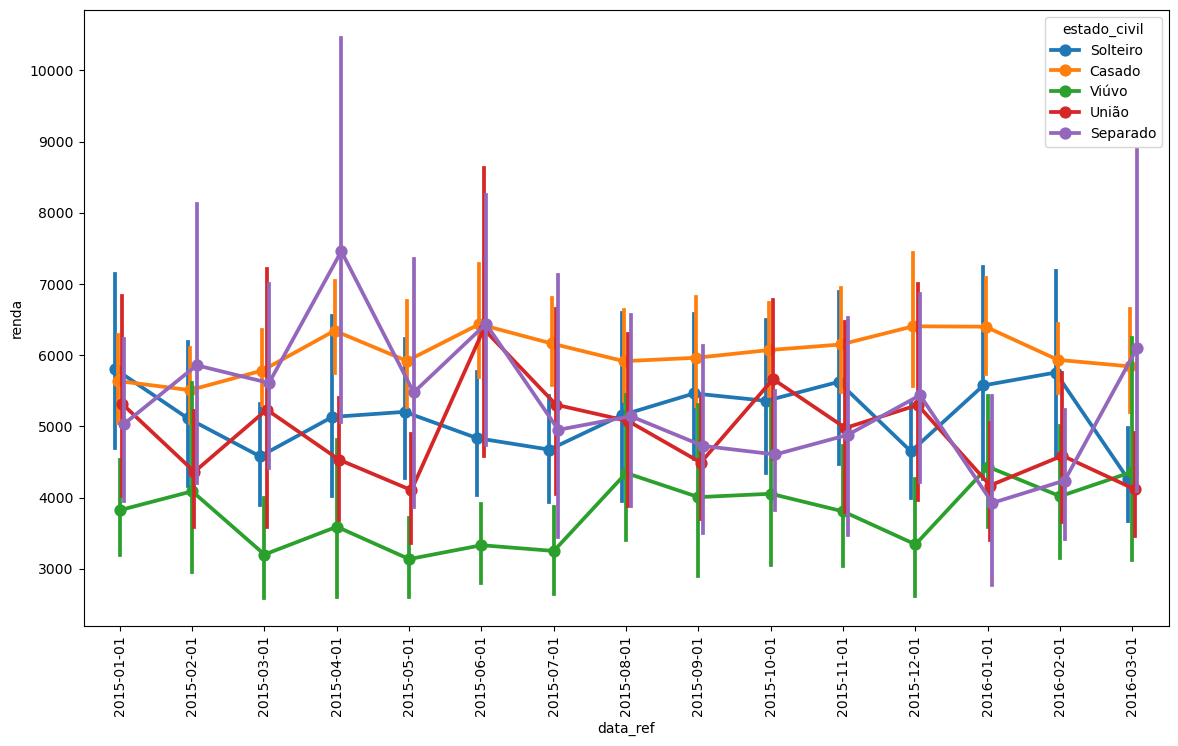

In [10]:
plt.subplots(figsize=(14, 8))
ax = sns.pointplot(x="data_ref", y="renda", hue = 'estado_civil',
                   data=df, dodge=True, errorbar=('ci', 95))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show

C:\Users\Matheus\AppData\Local\Temp\ipykernel_6956\2517939937.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

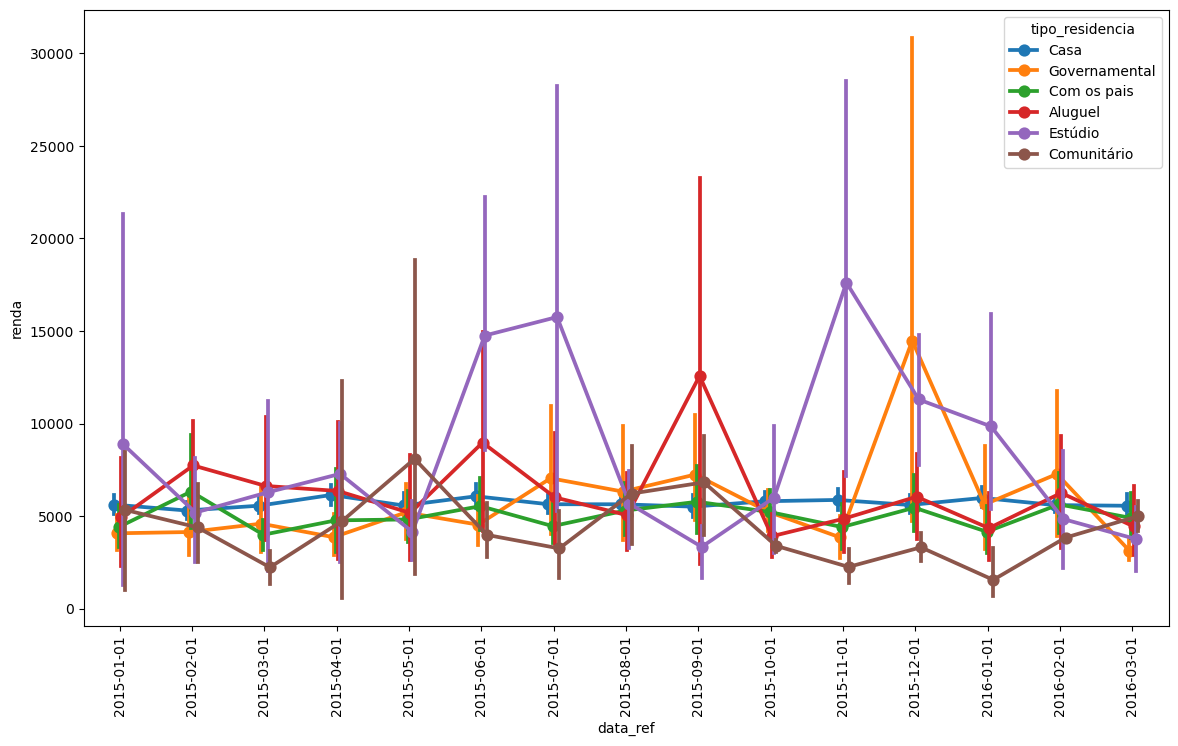

In [11]:
plt.subplots(figsize=(14, 8))

ax = sns.pointplot(x="data_ref", y="renda", hue = 'tipo_residencia',
                   data=df, dodge=True, errorbar=('ci', 95))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.show


* A variável 'tipo de renda', que descreve a fonte de renda dos indivíduos, apresenta uma categoria denominada 'BOLSISTA'. Existe uma considerável variação nos valores dessa categoria, o que pode influenciar a estabilidade e a precisão do modelo. É possível que a inclusão dos dados dos bolsistas  cause ruído nos resultados da análise. Considerando que o número de bolsistas na base de dados é pequeno em comparação com outras categorias, pode ser apropriado realizar um tratamento específico para esses valores ou até a exclusão dos dados dos bolsistas.

* O mesmo raciocinio acima se aplica a educação, com a categoria Pós Graduação, grande variação ao longo do tempo e poucas obervações. 

* Em relação as outras variveis, a principio, não foram encontrados comportamentos estranhos ao longo do tempo. 

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [12]:
# limpeza e seleção dos dados

df = df.dropna()
df = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)

df.head()

sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos        tipo_renda  \
0    F             False             True           0        Empresário   
1    M              True             True           0       Assalariado   
2    F              True             True           0        Empresário   
3    F             False             True           1  Servidor público   
4    M              True            False           0       Assalariado   

            educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0         Secundário     Solteiro            Casa     26       6.602740   
1  Superior completo       Casado            Casa     28       7.183562   
2  Superior completo       Casado            Casa     35       0.838356   
3  Superior completo       Casado            Casa     30       4.846575   
4         Secundário     Solteiro   Governamental     33       4.293151   

   qt_pessoas_residencia    renda  
0                    1.0  8060.34  
1                    2.0  1852.15  
2                    2.0  2253.89  
3                    3.0  6600.77  
4                    1.0  6475.97

In [13]:
# contrução de dummies e formatação dos dados

df = pd.get_dummies(df, columns=['sexo','tipo_renda','educacao',
                                 'estado_civil','tipo_residencia'], drop_first=True)

df = df.astype(float).dropna()

df.head()

posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0               0.0              1.0         0.0   26.0       6.602740   
1               1.0              1.0         0.0   28.0       7.183562   
2               1.0              1.0         0.0   35.0       0.838356   
3               0.0              1.0         1.0   30.0       4.846575   
4               1.0              0.0         0.0   33.0       4.293151   

   qt_pessoas_residencia    renda  sexo_M  tipo_renda_Bolsista  \
0                    1.0  8060.34     0.0                  0.0   
1                    2.0  1852.15     1.0                  0.0   
2                    2.0  2253.89     0.0                  0.0   
3                    3.0  6600.77     0.0                  0.0   
4                    1.0  6475.97     1.0                  0.0   

   tipo_renda_Empresário  ...  educacao_Superior incompleto  \
0                    1.0  ...                           0.0   
1                    0.0  ...                           0.0   
2                    1.0  ...                           0.0   
3                    0.0  ...                           0.0   
4                    0.0  ...                           0.0   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                    0.0                    1.0                 0.0   
1                    0.0                    0.0                 0.0   
2                    0.0                    0.0                 0.0   
3                    0.0                    0.0                 0.0   
4                    0.0                    1.0                 0.0   

   estado_civil_Viúvo  tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                 0.0                   1.0                          0.0   
1                 0.0                   1.0                          0.0   
2                 0.0                   1.0                          0.0   
3                 0.0                   1.0                          0.0   
4                 0.0                   0.0                          0.0   

   tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   tipo_residencia_Governamental  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            1.0  

[5 rows x 25 columns]

In [14]:
df = df.rename(columns={'educacao_Superior completo': 'educacao_Superior_completo'})

In [15]:
df.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'sexo_M',
       'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior_completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Casa',
       'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário',
       'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'],
      dtype='object')

In [16]:
# Criando e tratando um DataFrame para usar no Streamlit

df_streamlit = pd.DataFrame(columns=df.columns)
df_streamlit = df_streamlit.drop(columns=['renda'])
nova_linha = {col: 0 for col in df_streamlit.columns}
df_streamlit = pd.concat([df_streamlit, pd.DataFrame([nova_linha])], ignore_index=True)
df_streamlit.to_csv('df_limpo.csv', index=False)


In [17]:
df_streamlit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   posse_de_veiculo               1 non-null      object
 1   posse_de_imovel                1 non-null      object
 2   qtd_filhos                     1 non-null      object
 3   idade                          1 non-null      object
 4   tempo_emprego                  1 non-null      object
 5   qt_pessoas_residencia          1 non-null      object
 6   sexo_M                         1 non-null      object
 7   tipo_renda_Bolsista            1 non-null      object
 8   tipo_renda_Empresário          1 non-null      object
 9   tipo_renda_Pensionista         1 non-null      object
 10  tipo_renda_Servidor público    1 non-null      object
 11  educacao_Pós graduação         1 non-null      object
 12  educacao_Secundário            1 non-null      object
 13  educacao_

## Etapa 4 Crisp-DM: Modelagem

Será utilizado árvores de regressão para prever valores contínuos. Diferentemente das árvores de decisão, que são usadas para classificação, as árvores de regressão são projetadas para prever valores numéricos.


### Rodando o modelo


In [18]:
X = df.drop(columns = ['renda']).copy()
y = df[['renda']]

In [19]:
X.head()

posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0               0.0              1.0         0.0   26.0       6.602740   
1               1.0              1.0         0.0   28.0       7.183562   
2               1.0              1.0         0.0   35.0       0.838356   
3               0.0              1.0         1.0   30.0       4.846575   
4               1.0              0.0         0.0   33.0       4.293151   

   qt_pessoas_residencia  sexo_M  tipo_renda_Bolsista  tipo_renda_Empresário  \
0                    1.0     0.0                  0.0                    1.0   
1                    2.0     1.0                  0.0                    0.0   
2                    2.0     0.0                  0.0                    1.0   
3                    3.0     0.0                  0.0                    0.0   
4                    1.0     1.0                  0.0                    0.0   

   tipo_renda_Pensionista  ...  educacao_Superior incompleto  \
0                     0.0  ...                           0.0   
1                     0.0  ...                           0.0   
2                     0.0  ...                           0.0   
3                     0.0  ...                           0.0   
4                     0.0  ...                           0.0   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                    0.0                    1.0                 0.0   
1                    0.0                    0.0                 0.0   
2                    0.0                    0.0                 0.0   
3                    0.0                    0.0                 0.0   
4                    0.0                    1.0                 0.0   

   estado_civil_Viúvo  tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                 0.0                   1.0                          0.0   
1                 0.0                   1.0                          0.0   
2                 0.0                   1.0                          0.0   
3                 0.0                   1.0                          0.0   
4                 0.0                   0.0                          0.0   

   tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   tipo_residencia_Governamental  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            1.0  

[5 rows x 24 columns]

In [20]:
y.head()

renda
0  8060.34
1  1852.15
2  2253.89
3  6600.77
4  6475.97

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [22]:
reg_arvore = DecisionTreeRegressor(random_state=0, max_depth=8)

In [23]:
reg_arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

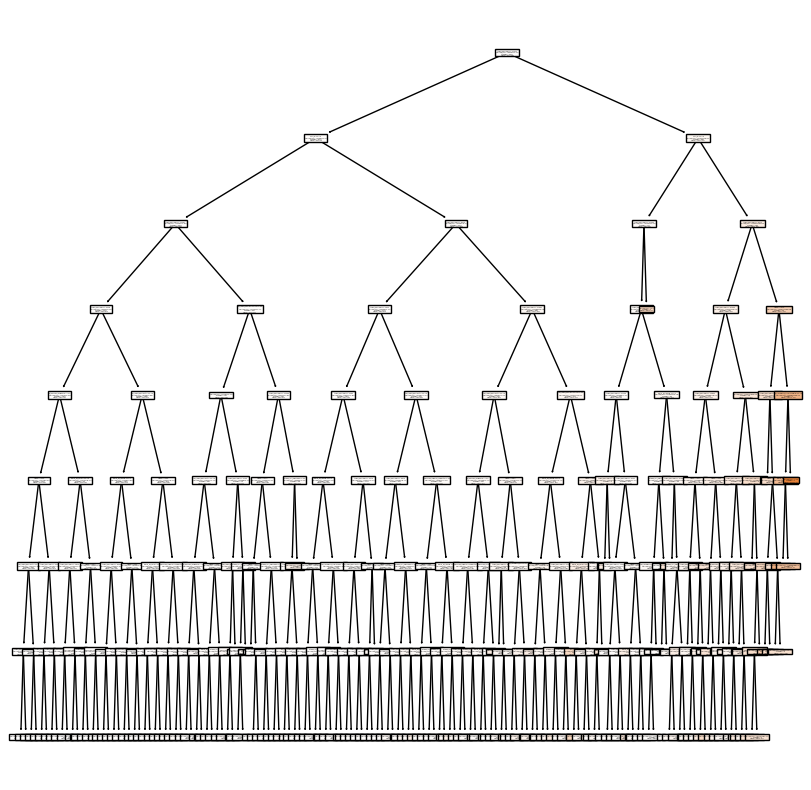

In [24]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg_arvore, 
                    feature_names=X.columns,  
                    filled=True) 

In [25]:
reg_arvore.score(X_train, y_train)

0.6643454196676459

In [26]:
reg_arvore.score(X_test, y_test)

0.26355954165176965

In [27]:
path = reg_arvore.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.82076609e-10, 1.95449794e+01, 8.44267921e+01,
        9.82806482e+01, 4.35723311e+02, 5.93543715e+02, 7.60395206e+02,
        8.44980844e+02, 1.12966866e+03, 1.76127025e+03, 2.14583641e+03,
        2.32977482e+03, 2.51250897e+03, 3.16812948e+03, 3.37148818e+03,
        3.37847821e+03, 3.52069017e+03, 4.16959701e+03, 4.73386187e+03,
        4.74023482e+03, 5.48464421e+03, 6.74691594e+03, 6.87600175e+03,
        7.00347460e+03, 7.08091432e+03, 7.38457864e+03, 7.45428140e+03,
        7.45506189e+03, 7.47678335e+03, 7.90377738e+03, 8.13941842e+03,
        8.23459669e+03, 8.94945614e+03, 8.96892730e+03, 1.00763328e+04,
        1.16321043e+04, 1.20067384e+04, 1.20919955e+04, 1.25334316e+04,
        1.30839092e+04, 1.34905599e+04, 1.35691236e+04, 1.40304628e+04,
        1.41013966e+04, 1.42261517e+04, 1.48105059e+04, 1.48134351e+04,
        1.57725574e+04, 1.59193522e+04, 1.67442621e+04, 1.73016463e+04,
        1.80803674e+04, 1.81336359e+04, 1.81963452

Text(0, 0.5, 'Impureza total das folhas')

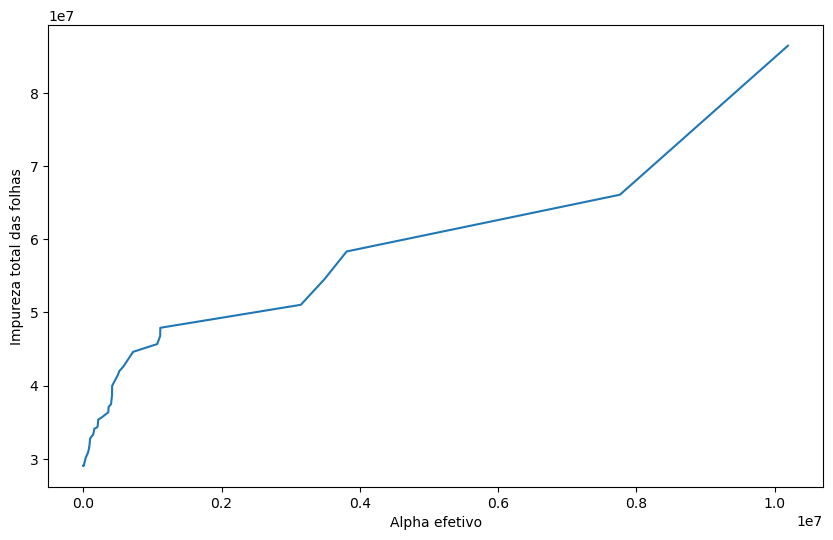

In [28]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [29]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

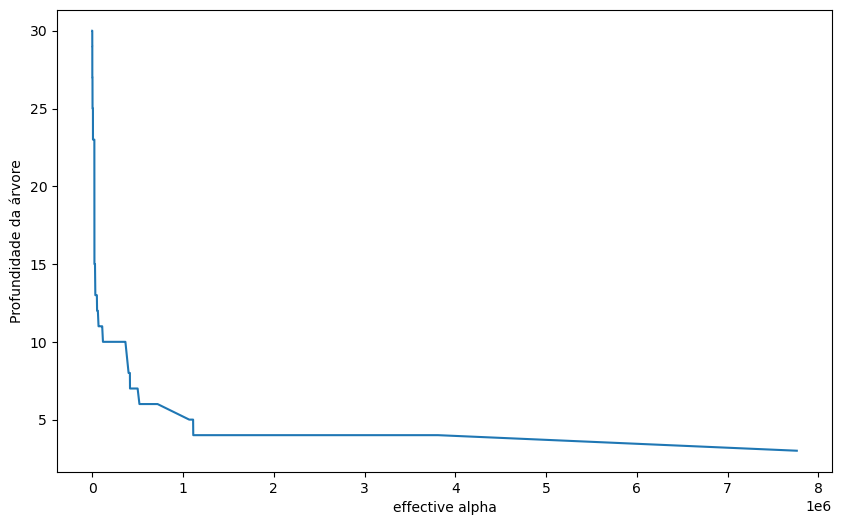

In [30]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [31]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

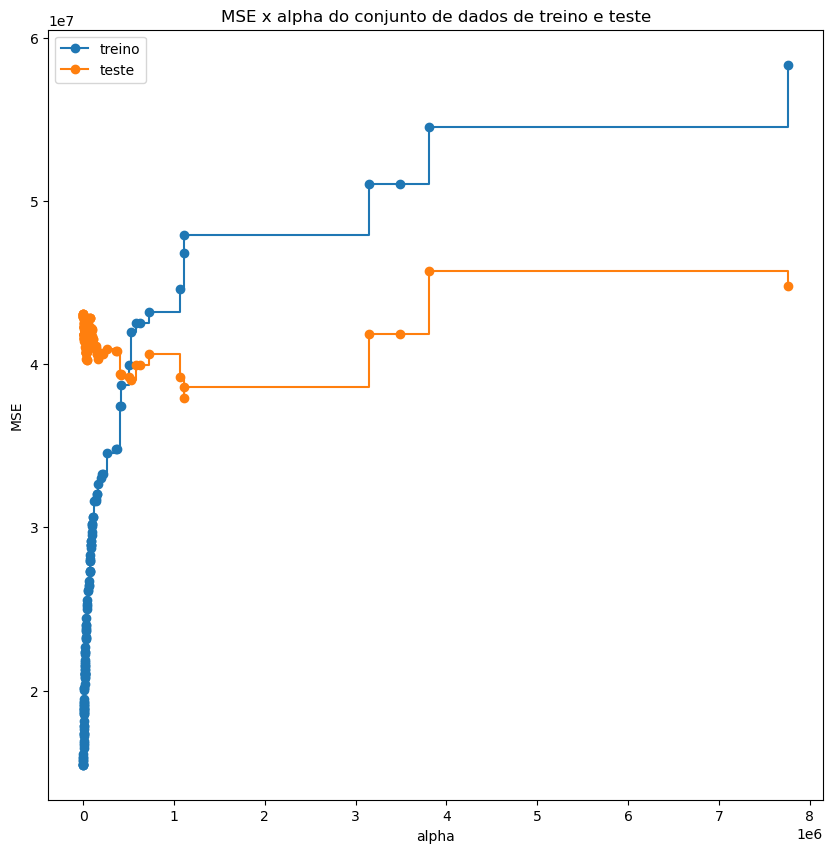

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
ccp_alphas

array([0.00000000e+00, 5.82076609e-10, 1.95449794e+01, 8.44267921e+01,
       9.82806482e+01, 4.35723311e+02, 5.93543715e+02, 7.60395206e+02,
       8.44980844e+02, 1.12966866e+03, 1.76127025e+03, 2.14583641e+03,
       2.32977482e+03, 2.51250897e+03, 3.16812948e+03, 3.37148818e+03,
       3.37847821e+03, 3.52069017e+03, 4.16959701e+03, 4.73386187e+03,
       4.74023482e+03, 5.48464421e+03, 6.74691594e+03, 6.87600175e+03,
       7.00347460e+03, 7.08091432e+03, 7.38457864e+03, 7.45428140e+03,
       7.45506189e+03, 7.47678335e+03, 7.90377738e+03, 8.13941842e+03,
       8.23459669e+03, 8.94945614e+03, 8.96892730e+03, 1.00763328e+04,
       1.16321043e+04, 1.20067384e+04, 1.20919955e+04, 1.25334316e+04,
       1.30839092e+04, 1.34905599e+04, 1.35691236e+04, 1.40304628e+04,
       1.41013966e+04, 1.42261517e+04, 1.48105059e+04, 1.48134351e+04,
       1.57725574e+04, 1.59193522e+04, 1.67442621e+04, 1.73016463e+04,
       1.80803674e+04, 1.81336359e+04, 1.81963452e+04, 1.99602691e+04,
      

In [34]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=3, max_depth=6)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=3, max_depth=6, random_state=0)

In [35]:
arvore_final.score(X_train, y_train).round(2)

0.57

In [36]:
arvore_final.score(X_test, y_test).round(2)

0.35

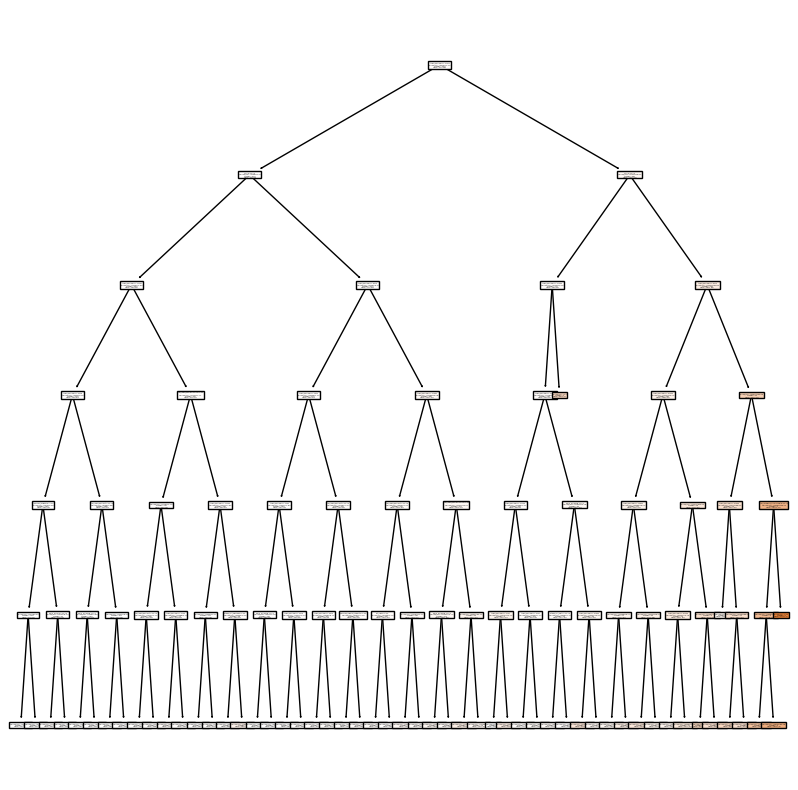

In [37]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [38]:
y_pred_train = arvore_final.predict(X_train)
y_pred_test = arvore_final.predict(X_test)

In [39]:
print("Treinamento R²:", r2_score(y_train, y_pred_train))
print("Treinamento MSE:", mean_squared_error(y_train, y_pred_train))
print("Teste R²:", r2_score(y_test, y_pred_test))
print("Teste MSE:", mean_squared_error(y_test, y_pred_test))

Treinamento R²: 0.5722091057726075
Treinamento MSE: 36995479.17276732
Teste R²: 0.34664533622626315
Teste MSE: 36996641.10373707


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Minha integração com o Streamlit envolve carregar o modelo de previsão de renda desenvolvido no Jupyter Notebook e coletar dados de um usuário hipotético para prever sua renda.

In [40]:
#Salvando o modelo 

with open('arvore_final_model.pkl', 'wb') as file:
    pickle.dump(arvore_final, file)